In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [18]:
simple = pd.read_csv('/Users/flatironschool/Absenteeism_Project/data/processed/binned_wo_imputed.csv')

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
simple.tail()

,Unnamed: 0,Unnamed: 0.1,index,Unnamed: 0.1.1,Unnamed: 0.1.1.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,...,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate,grad_slice,grad_rate_bin,four_rate_bins
16568,16568,16568,21854,21854,21854,WYOMING,Sheridan County School District #1,560569000311,Big Horn High School,37,...,0.013245,4.0,0.026490,1738.913907,0.0,0.006623,0.846154,90,90%+,90%+
16569,16569,16569,21858,21858,21858,WYOMING,Sheridan County School District #2,560569500360,Sheridan High School,236,...,0.046796,0.0,0.000000,1694.559176,0.0,0.005086,0.198779,89,80-89%,80-89%
16570,16570,16570,21861,21861,21861,WYOMING,Sweetwater County School District #2,560576200324,Green River High School,176,...,0.141570,1.0,0.001287,1840.877490,0.0,0.003861,0.200000,85,80-89%,80-89%
16571,16571,16571,21863,21863,21863,WYOMING,Teton County School District #1,560583000335,Jackson Hole High School,127,...,0.040625,0.0,0.000000,4153.518984,0.0,0.004687,0.118939,95,90%+,90%+
16572,16572,16572,21866,21866,21866,WYOMING,Washakie County School District #1,560624000343,Worland High School,105,...,0.025000,0.0,0.000000,3015.755325,0.0,0.004275,0.331544,75,70-79%,60-79%


In [20]:
simple['four_rate_bins'].value_counts()

90%+      8712
80-89%    4257
60-79%    1993
0-59%     1611
Name: four_rate_bins, dtype: int64

In [21]:
grad_90 = simple[simple['four_rate_bins'] == '90%+']
grad_80 = simple[simple['four_rate_bins'] == '80-89%']
grad_70 = simple[simple['four_rate_bins'] == '60-79%']
grad_50 = simple[simple['four_rate_bins'] == '0-59%']

In [22]:
grad_90.head()

,Unnamed: 0,Unnamed: 0.1,index,Unnamed: 0.1.1,Unnamed: 0.1.1.1,STNAM,LEANM,NCESSCH,SCHNAM,ALL_COHORT_1516,...,suspensed_day_rate,harassed,harassed_rate,activities_funds_rate,non_cert_rate,counselor_rate,absent_teacher_rate,grad_slice,grad_rate_bin,four_rate_bins
0,0,0,0,0,0,ALABAMA,Albertville City,10000500871,Albertville High Sch,296,...,0.060232,0.0,0.000000,2811.937359,0.000000,0.003475,0.378788,92,90%+,90%+
1,1,1,1,1,1,ALABAMA,Marshall County,10000600872,Asbury Sch,67,...,0.018553,2.0,0.003711,4825.189777,0.000000,0.002783,0.100000,95,90%+,90%+
5,5,5,5,5,5,ALABAMA,Hoover City,10000700251,Hoover High Sch,714,...,0.053927,1.0,0.000337,434.833734,0.019066,0.001685,0.333651,92,90%+,90%+
6,6,6,7,7,7,ALABAMA,Hoover City,10000701456,Spain Park High Sch,412,...,0.138342,0.0,0.000000,511.925343,0.016920,0.001789,0.346870,94,90%+,90%+
7,7,7,8,8,8,ALABAMA,Madison City,10000800831,Bob Jones High Sch,451,...,0.041002,2.0,0.001139,72676.817158,0.000000,0.002278,0.019608,97,90%+,90%+


/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


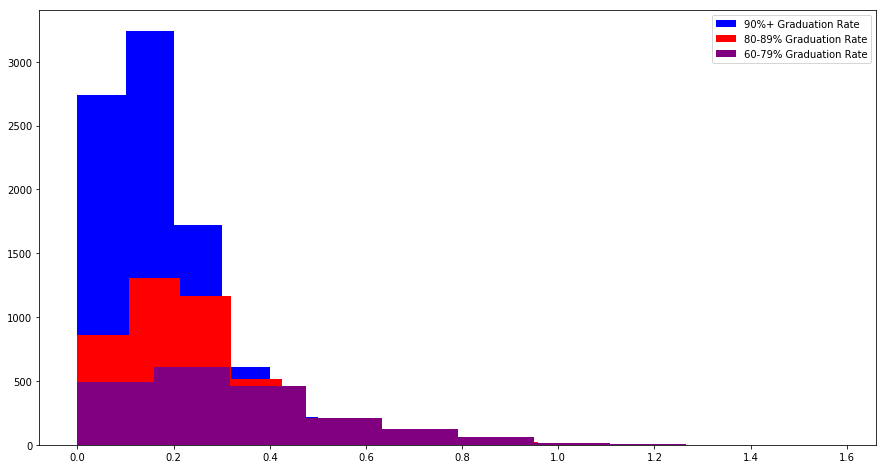

In [25]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['chronic_absent_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['chronic_absent_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['chronic_absent_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


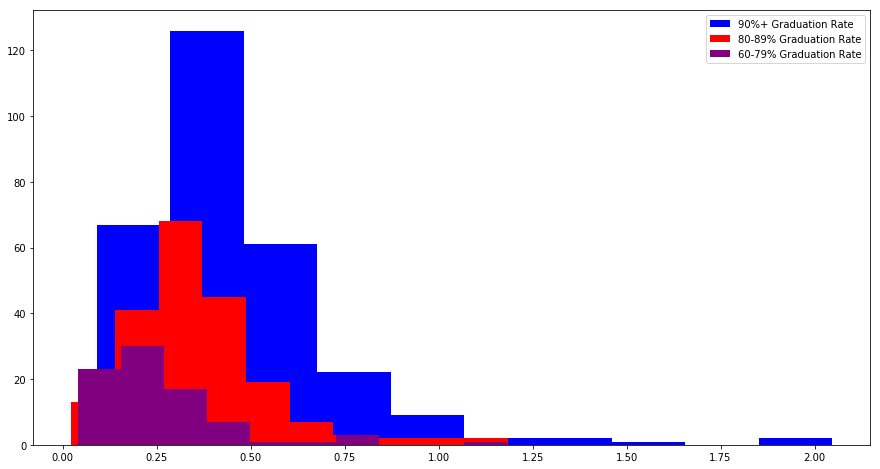

In [26]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['ap_ib_de_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['ap_ib_de_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['ap_ib_de_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


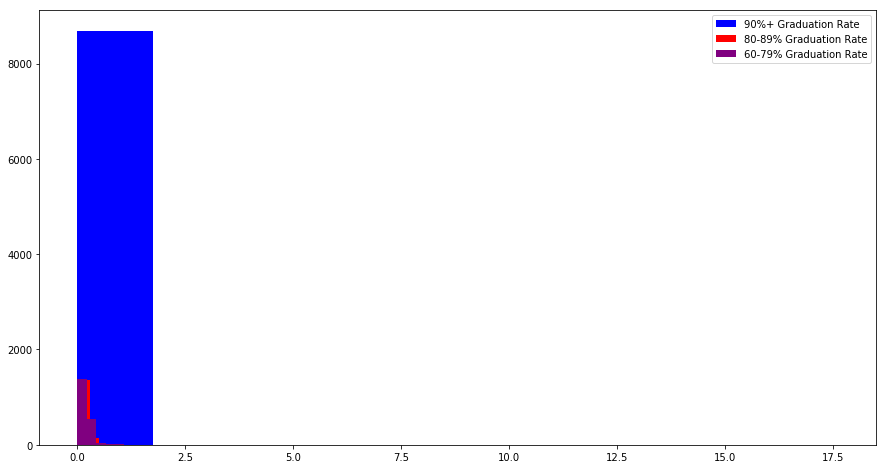

In [27]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['sat_act_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['sat_act_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['sat_act_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


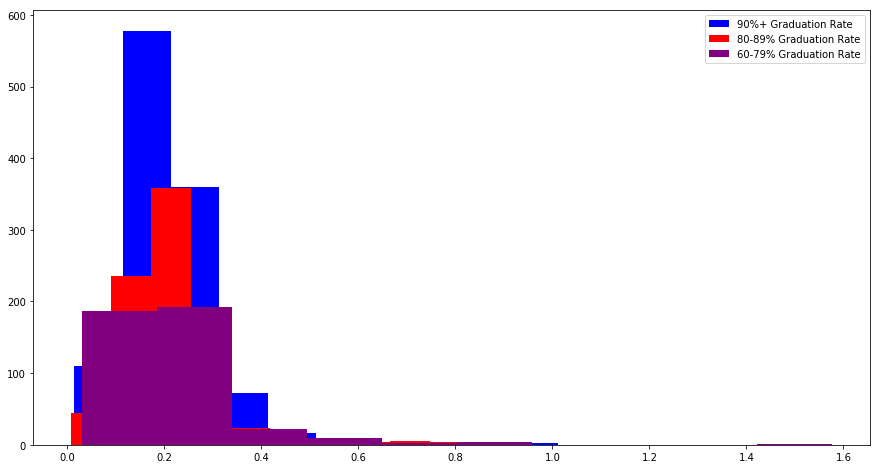

In [28]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['pass_algebra_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['pass_algebra_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['pass_algebra_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


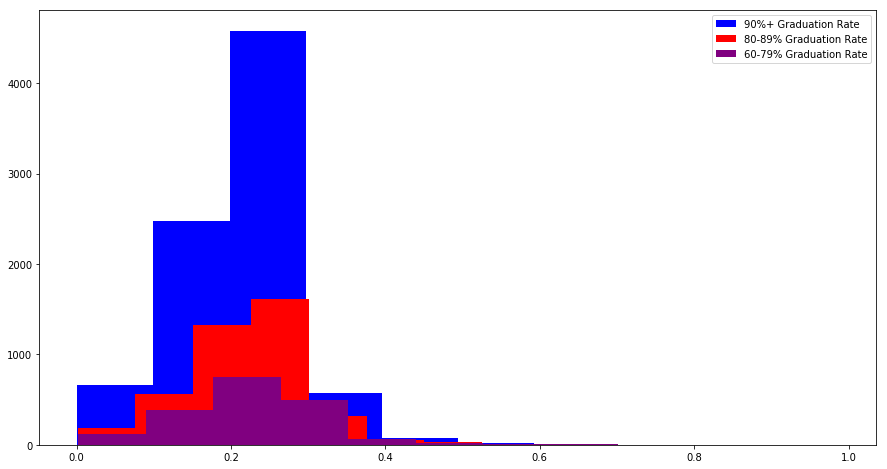

In [29]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['geometry_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['geometry_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['geometry_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


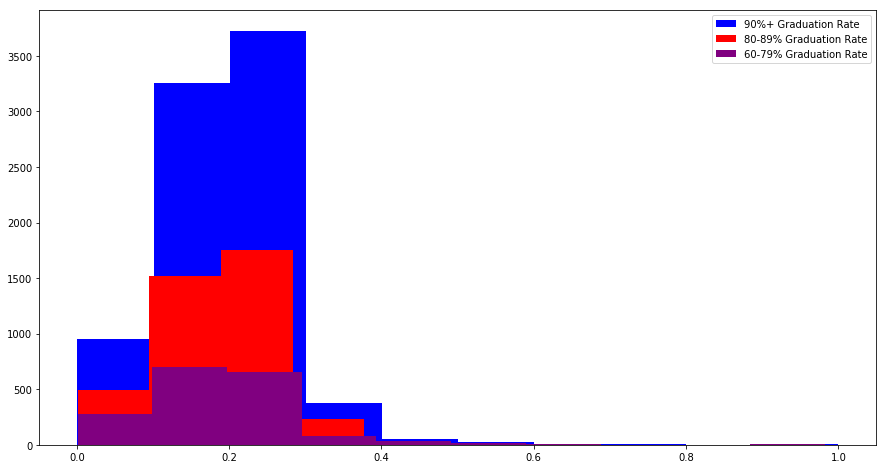

In [30]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['algebra2_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['algebra2_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['algebra2_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


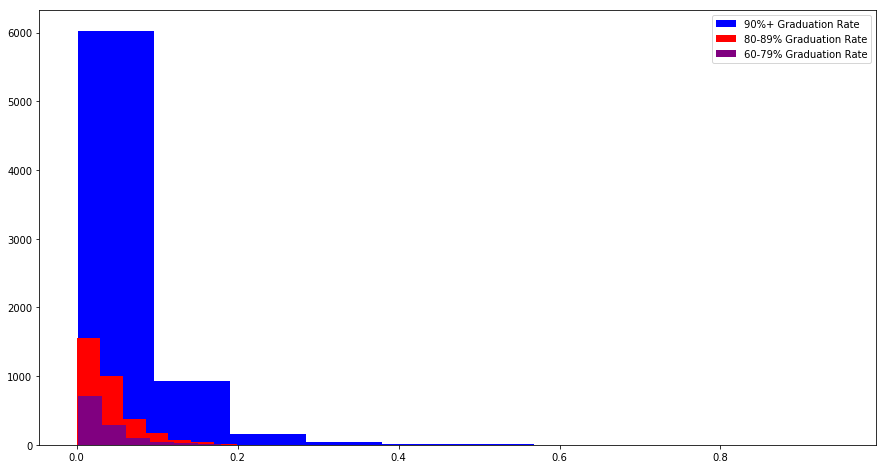

In [31]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['calc_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['calc_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['calc_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


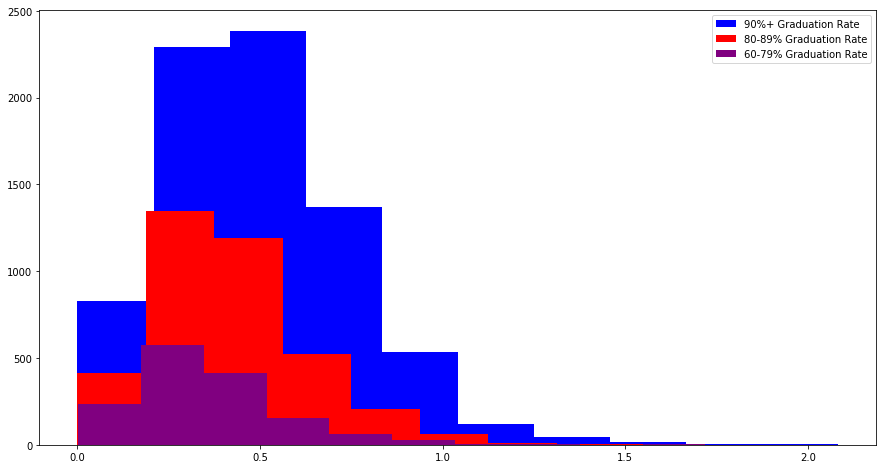

In [32]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['sports_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['sports_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['sports_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


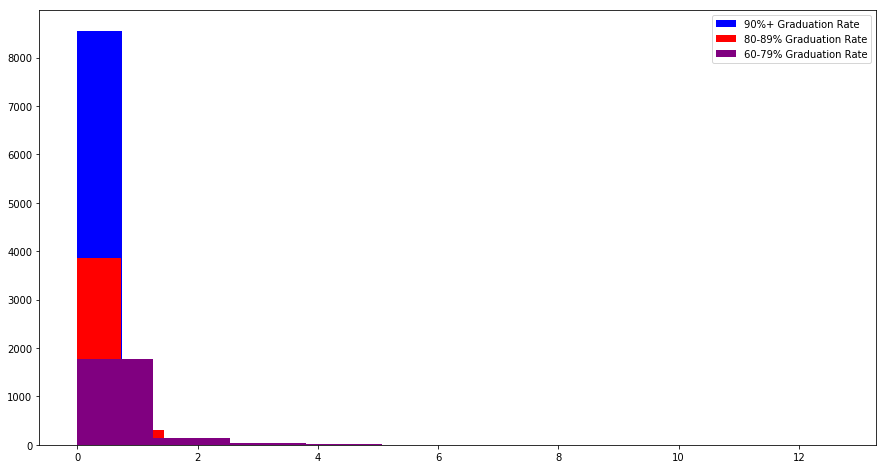

In [33]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['suspensed_day_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['suspensed_day_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['suspensed_day_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


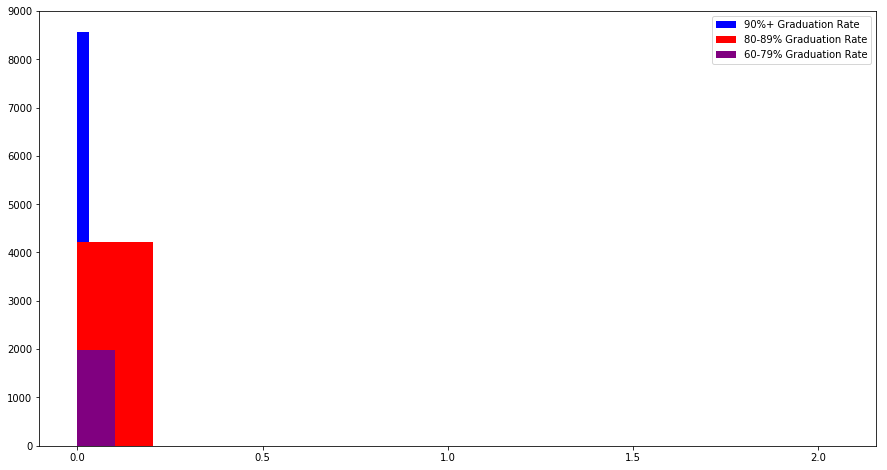

In [34]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['harassed_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['harassed_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['harassed_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


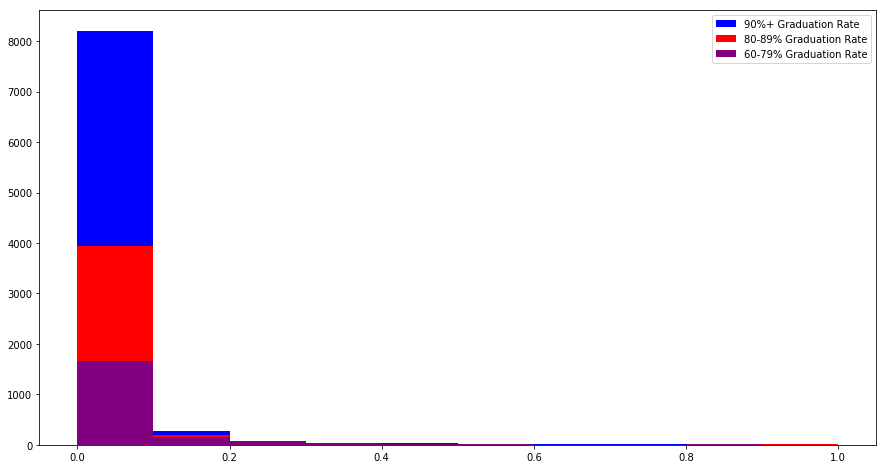

In [35]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['non_cert_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['non_cert_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['non_cert_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


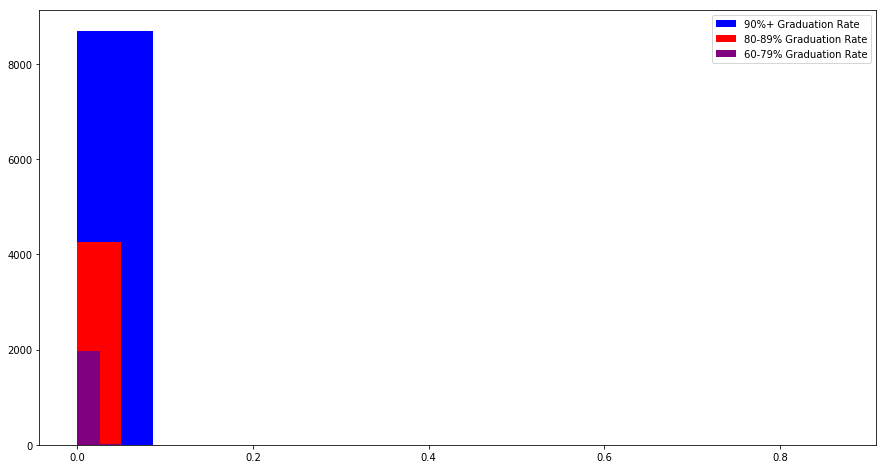

In [36]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['counselor_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['counselor_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['counselor_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/absenteeism/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


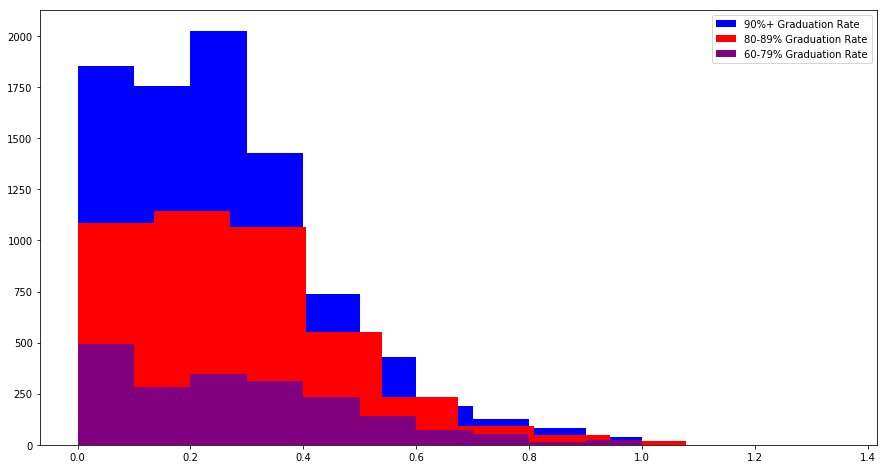

In [41]:
plt.figure(figsize=(15,8))
plt.hist(grad_90['absent_teacher_rate'], color = 'blue', label = '90%+ Graduation Rate')
plt.hist(grad_80['absent_teacher_rate'], color = 'red', label = '80-89% Graduation Rate')
plt.hist(grad_70['absent_teacher_rate'], color = 'purple', label = '60-79% Graduation Rate')
plt.legend()

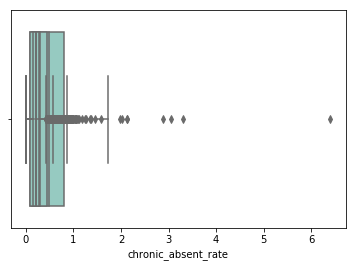

In [49]:
sns.boxplot(x=grad_50['chronic_absent_rate'],palette="Set3")
sns.boxplot(x=grad_70['chronic_absent_rate'],palette="Set3")
sns.boxplot(x=grad_80['chronic_absent_rate'],palette="Set3")
sns.boxplot(x=grad_90['chronic_absent_rate'],palette="Set3")

In [50]:
simple.chronic_absent_rate.quantile([0.25,0.5,0.75])


0.25    0.096657
0.50    0.180701
0.75    0.294678
Name: chronic_absent_rate, dtype: float64

In [60]:
print('90%+ Graduate Chronic Absenteeism Rate (25th, 50th, 75th percentile):\n',grad_90.chronic_absent_rate.quantile([0.25,0.5,0.75]))


90%+ Graduate Chronic Absenteeism Rate (25th, 50th, 75th percentile):
 0.25    0.083107
0.50    0.145833
0.75    0.221578
Name: chronic_absent_rate, dtype: float64
